In [1]:

import sys
import os
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from time import time

sys.path.append("/home/natacha/Documents/Work/python")  # to import galib
sys.path.insert(1, os.path.join(sys.path[0], '..'))  #to use PersistentGraph submodules
sys.path.insert(1, os.path.join(sys.path[0], '../../'))  #to use PersistentGraph submodules

from persistentgraph import PersistentGraph
from plots import *
from analysis import *
from DataAnalysis.statistics import extract_variables


In [2]:
nc = Dataset("/home/natacha/Documents/Work/Data/Bergen/ec.ens.2020012900.sfc.meteogram.nc","r")
(list_var, var_names) = extract_variables(nc, var_names=["t2m"], ind_lat=np.array([0]), ind_long=np.array([0]))
members = np.transpose(list_var[0].squeeze())
nc02 = Dataset("/home/natacha/Documents/Work/Data/Bergen/ec.ens.2020011400.sfc.meteogram.nc","r")
(list_var, var_names) = extract_variables(nc02, var_names=["t2m"], ind_lat=np.array([0]), ind_long=np.array([0]))
members02 = np.transpose(list_var[0].squeeze())
dist_weights = np.loadtxt("/home/natacha/Documents/tmp/figs/global_variation_t2m/all_forecasts_max_distance.txt")

In [3]:
g01 = PersistentGraph(members,dist_weights)
#g = PersistentGraph(members)
start = time()
g01.construct_graph(verbose=False)
end = time()
print("Graph constructed in %.2f" %(end-start))
print(g01.edges[0][0].time_step)
print(g01.vertices[0][0])

NB STEPS CHANGED 2500 VS 1999
Graph constructed in 3.03
0


In [4]:
for s in range(2):
    plot_as_graph(g01, s, show_edges=True)

TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdbed858450>)

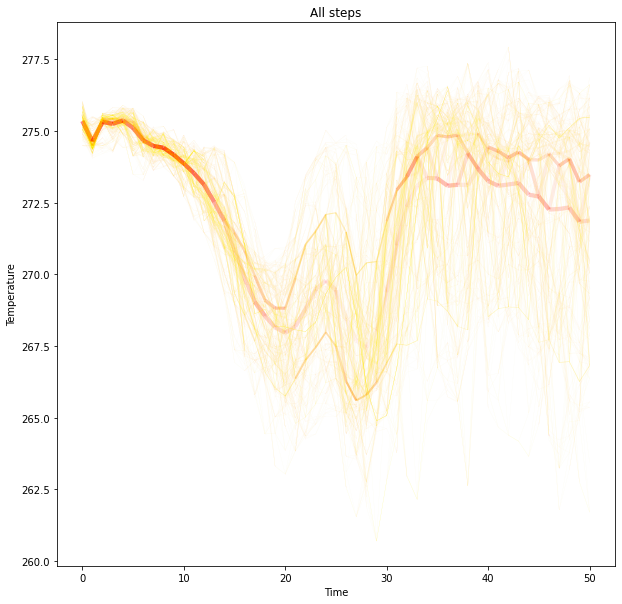

In [5]:
stats01 = basic_stats(g01.edges)
plot_as_graph(g01, show_edges=True, show_vertices=False,
    #threshold_m=5, threshold_l = stats01["mean_ratio_life"]+stats01["std_ratio_life"]
             )

In [6]:

print(g01.nb_vertices/g01.nb_vertices_max)
print(g01.nb_vertices)

[0.10509804 0.11137255 0.08862745 0.11921569 0.09019608 0.09803922
 0.09803922 0.09490196 0.11137255 0.0972549  0.08941176 0.11607843
 0.09333333 0.09960784 0.10039216 0.09647059 0.09568627 0.09411765
 0.09568627 0.09568627 0.09882353 0.09490196 0.09411765 0.08705882
 0.09411765 0.09019608 0.08941176 0.09960784 0.09568627 0.09098039
 0.09490196 0.09254902 0.09098039 0.10196078 0.09882353 0.09803922
 0.09960784 0.10431373 0.09333333 0.09647059 0.09568627 0.09176471
 0.10196078 0.09098039 0.09803922 0.09176471 0.09490196 0.09333333
 0.10352941 0.09333333 0.09568627]
[134 142 113 152 115 125 125 121 142 124 114 148 119 127 128 123 122 120
 122 122 126 121 120 111 120 115 114 127 122 116 121 118 116 130 126 125
 127 133 119 123 122 117 130 116 125 117 121 119 132 119 122]


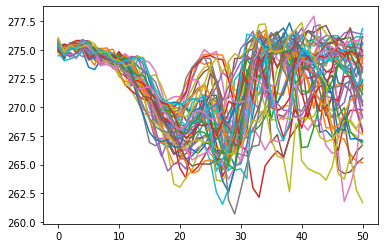

In [7]:
plt.plot(np.transpose(g01.members))
plt.show()

In [8]:
g02 = PersistentGraph(members02, dist_weights)
#g02 = PersistentGraph(members02)
start = time()
g02.construct_graph(verbose=False)
end = time()
print("Graph constructed in %.2f" %(end-start))

Graph constructed in 2.17


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdbe93c6b10>)

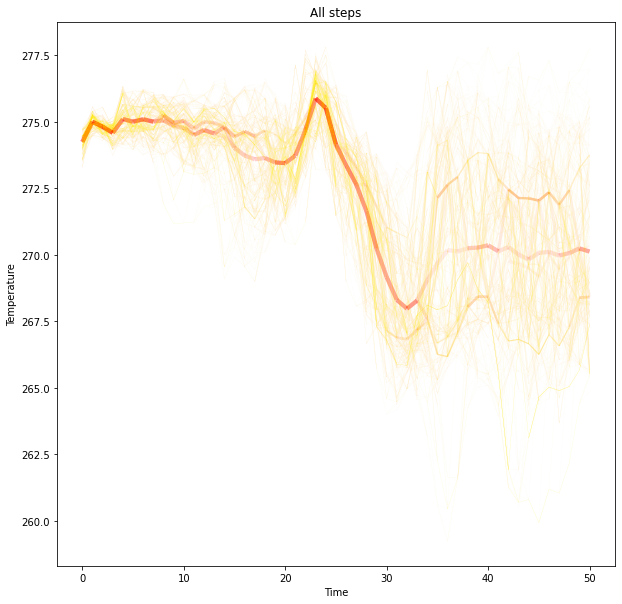

In [9]:
stats02 = basic_stats(g02.edges)
plot_as_graph(
    g02, show_edges=True, show_vertices=False,
    #threshold_m=5, threshold_l = stats02["mean_ratio_life"]+stats01["std_ratio_life"]
)


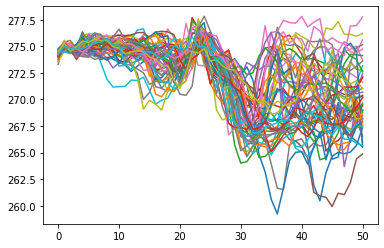

In [10]:
plt.plot(np.transpose(g02.members))
plt.show()


In [11]:

print("====== Graph 01 ======")
print(stats01["mean_ratio_life"])
print(stats01["std_ratio_life"])
print(stats01["max_ratio_life"])
print(stats01["min_ratio_life"])
print(stats01["mean_ratio_members"])
print(stats01["std_ratio_members"])
print(stats01["max_ratio_members"])
print(stats01["min_ratio_members"])

print("====== Graph 02 ======")
print(stats02["mean_ratio_life"])
print(stats02["std_ratio_life"])
print(stats02["max_ratio_life"])
print(stats02["min_ratio_life"])
print(stats02["mean_ratio_members"])
print(stats02["std_ratio_members"])
print(stats02["max_ratio_members"])
print(stats02["min_ratio_members"])

print(g02.nb_vertices/g02.nb_vertices_max)
print(g02.nb_vertices)
print(g02.nb_edges)
for t in range(20,20):  
    e_lives = [e.ratio_life for e in g02.edges[t]]
    plt.figure(figsize=(10,10))
    plt.scatter(range(len(e_lives)), e_lives)

====== Graph 01 ======
0.021055523456133807
0.050077491934587916
0.9666302593479785
0.0
0.040291092044382554
0.07722505063980876
1.0
0.02
====== Graph 02 ======
0.019591617846781175
0.04625978602276102
0.8732687338514421
0.0
0.039668350243597196
0.07553901694713434
1.0
0.02
[0.11058824 0.09647059 0.11529412 0.09882353 0.08862745 0.0972549
 0.09960784 0.09019608 0.09333333 0.09333333 0.09333333 0.09647059
 0.09490196 0.08862745 0.09411765 0.0972549  0.09019608 0.09254902
 0.09176471 0.09803922 0.09960784 0.08941176 0.09333333 0.09333333
 0.09882353 0.09803922 0.08862745 0.09803922 0.10196078 0.10431373
 0.09254902 0.10117647 0.09333333 0.10431373 0.09882353 0.09882353
 0.09333333 0.09176471 0.09960784 0.09647059 0.09568627 0.09411765
 0.10196078 0.09098039 0.09490196 0.09568627 0.09411765 0.09333333
 0.09882353 0.09647059 0.10039216]
[141 123 147 126 113 124 127 115 119 119 119 123 121 113 120 124 115 118
 117 125 127 114 119 119 126 125 113 125 130 133 118 129 119 133 126 126
 119 117 

In [12]:
start = time()
barcodes_edges01 = compute_barcodes(g01.edges, g01.distances)
end = time()
barcodes_vertices01 = compute_barcodes(g01.vertices, g01.distances)

#plot_barcodes(barcodes)

In [13]:
start = time()
barcodes_edges02 = compute_barcodes(g02.edges, g02.distances)
end = time()
barcodes_vertices02 = compute_barcodes(g02.vertices, g02.distances)


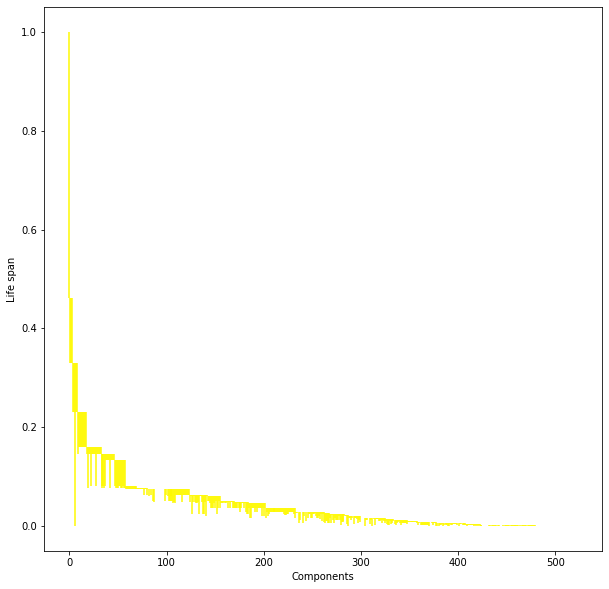

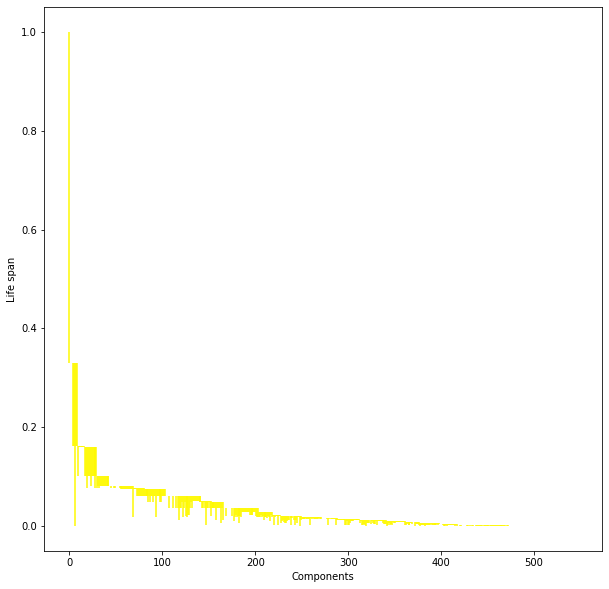

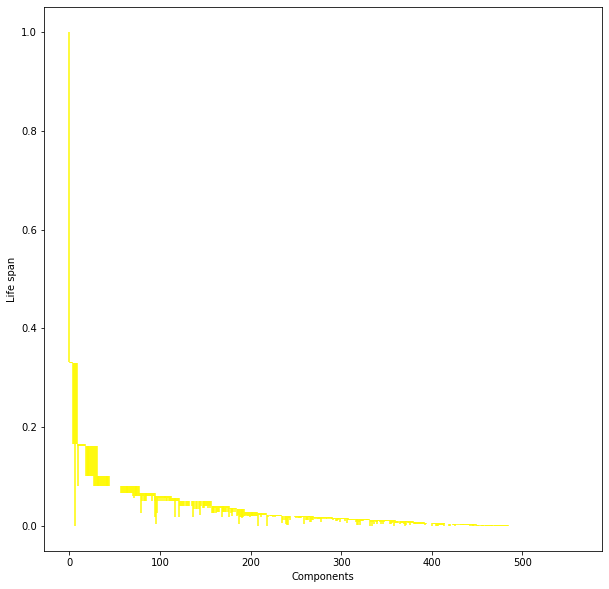

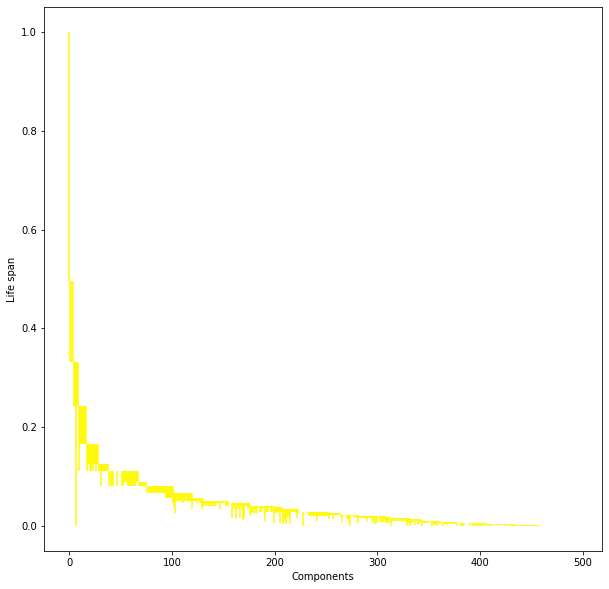

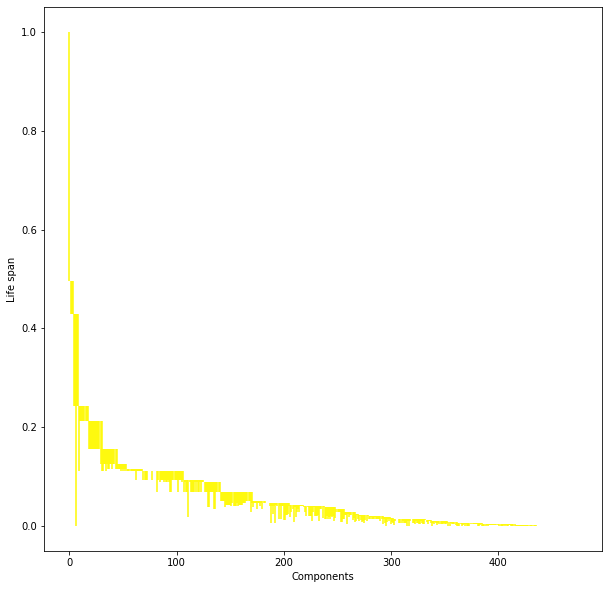

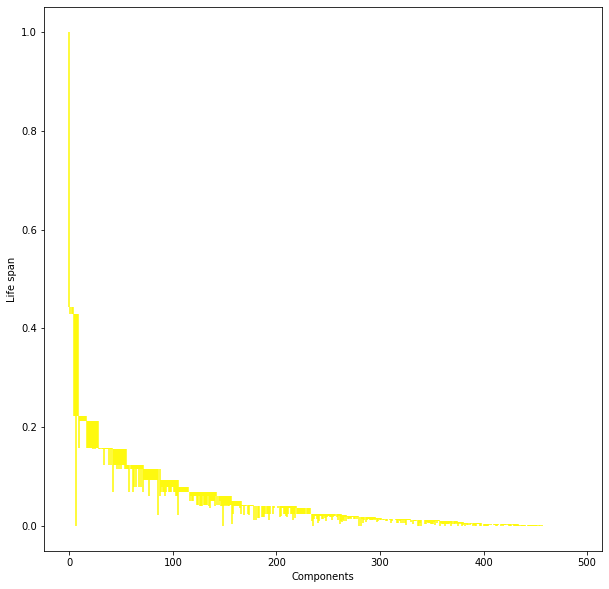

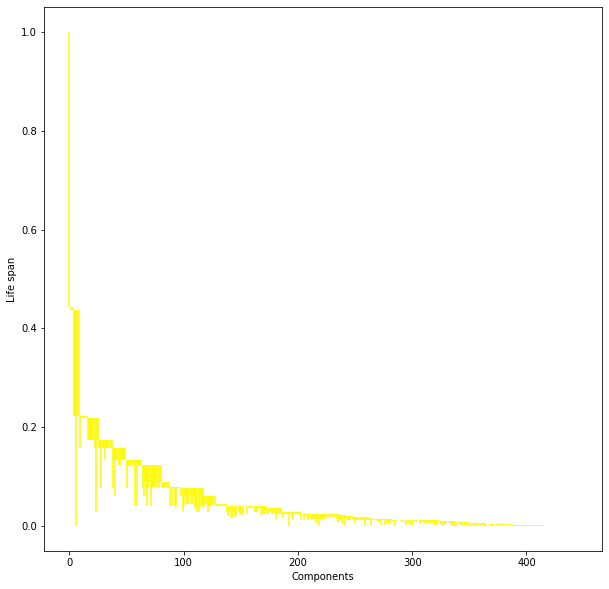

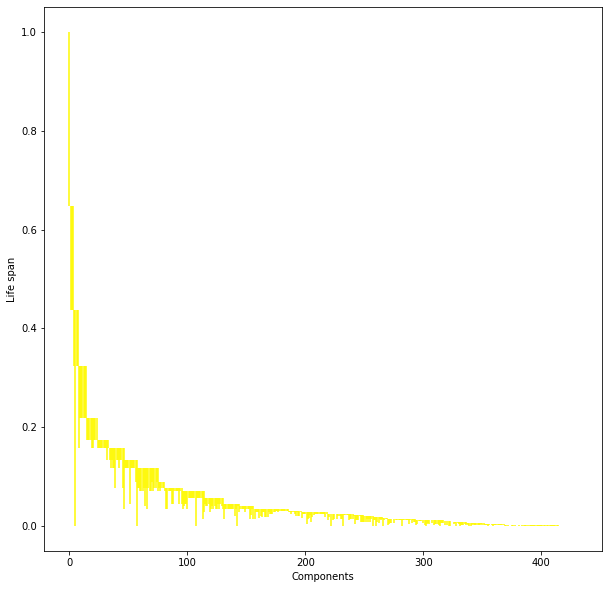

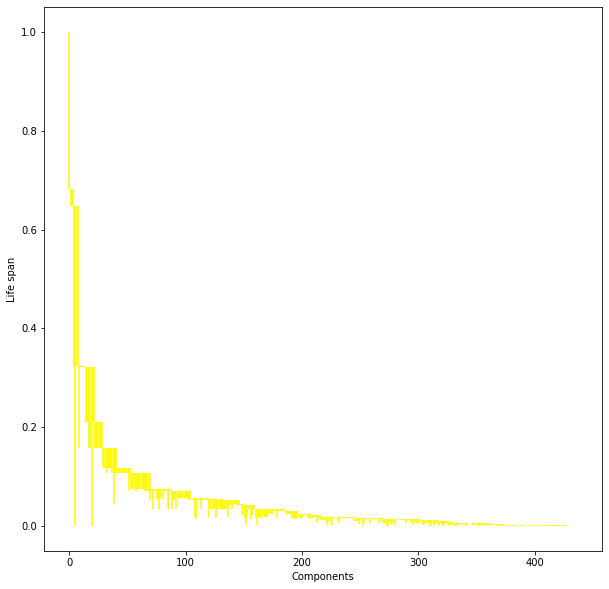

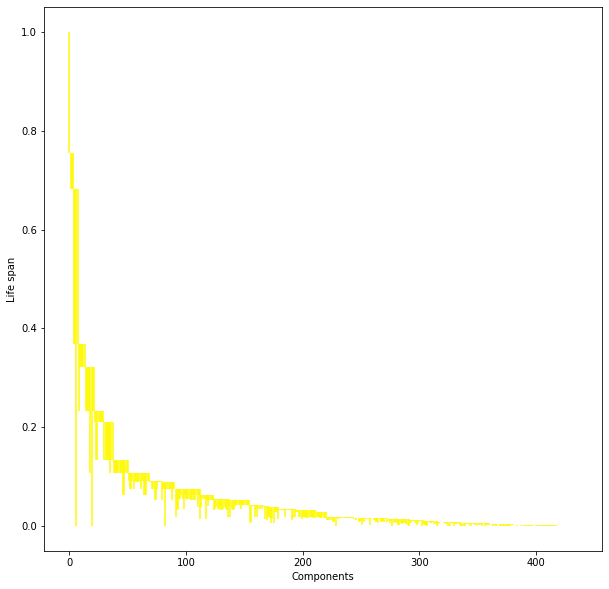

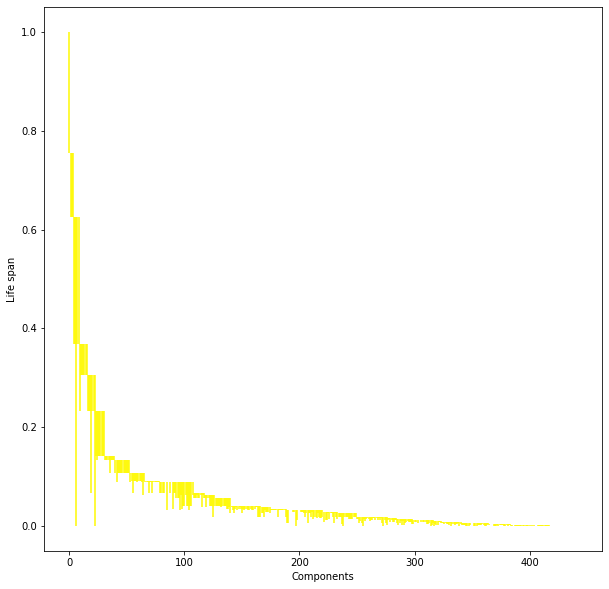

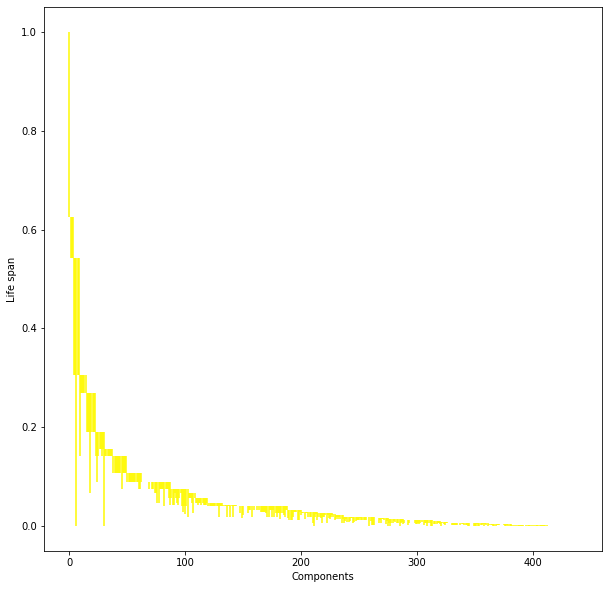

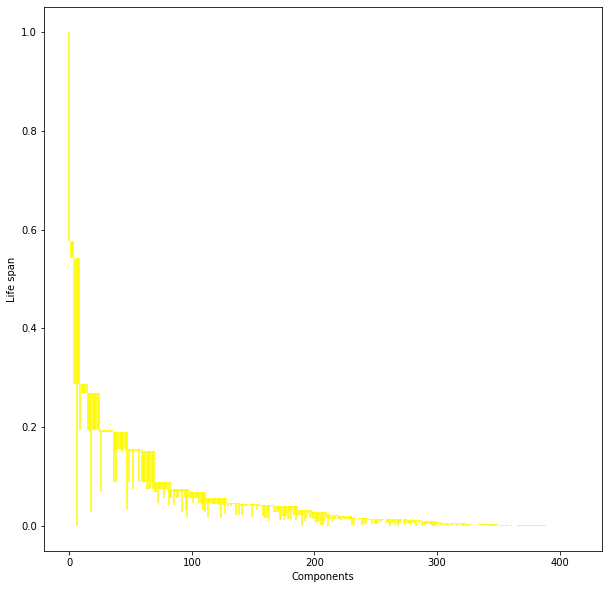

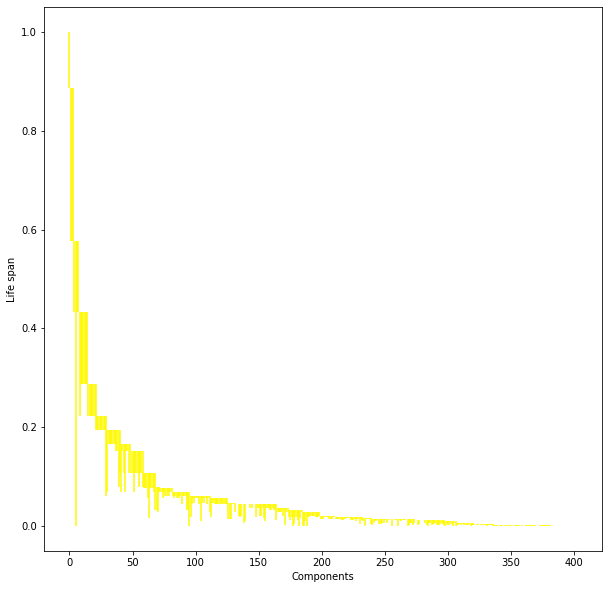

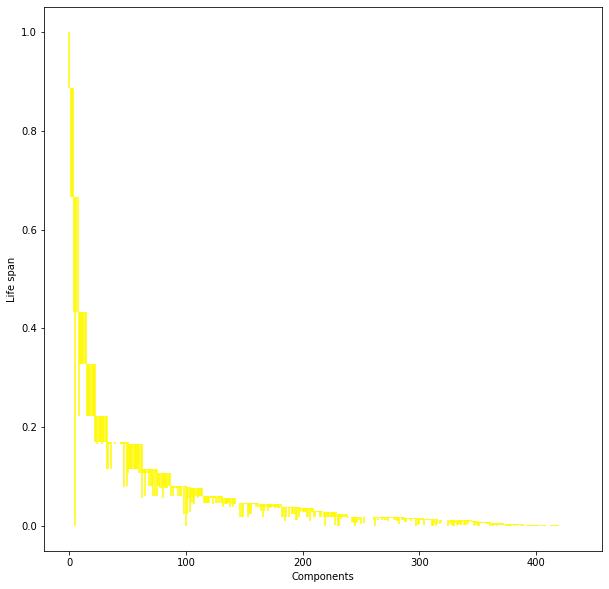

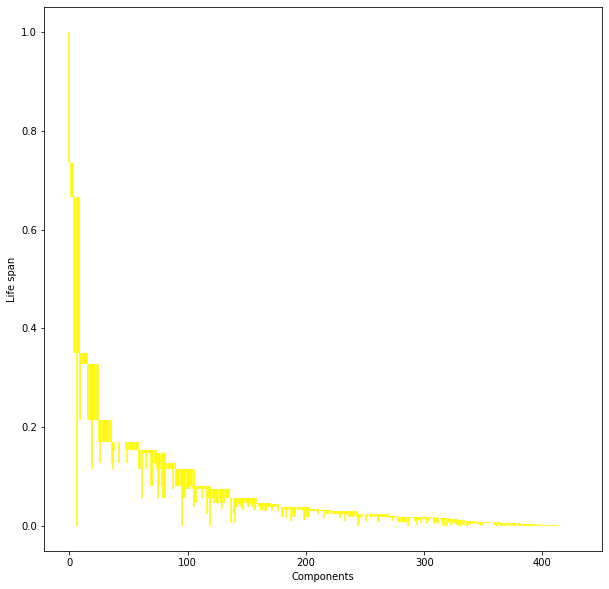

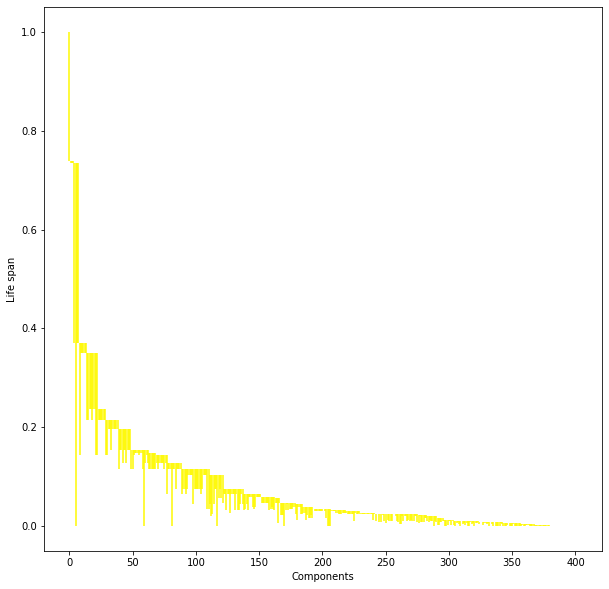

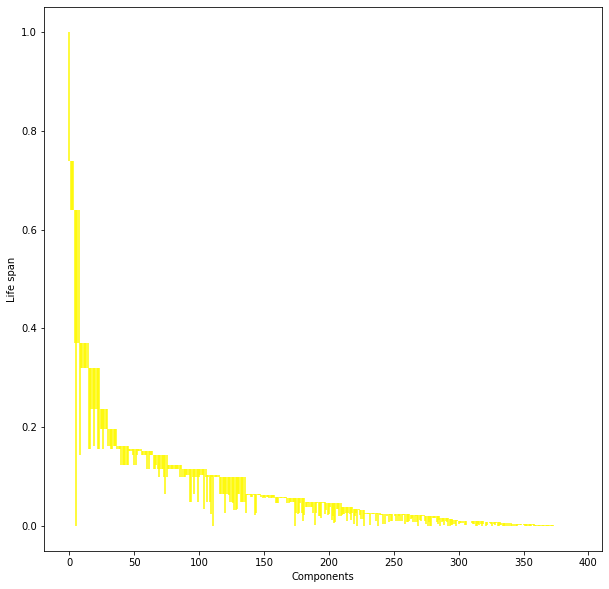

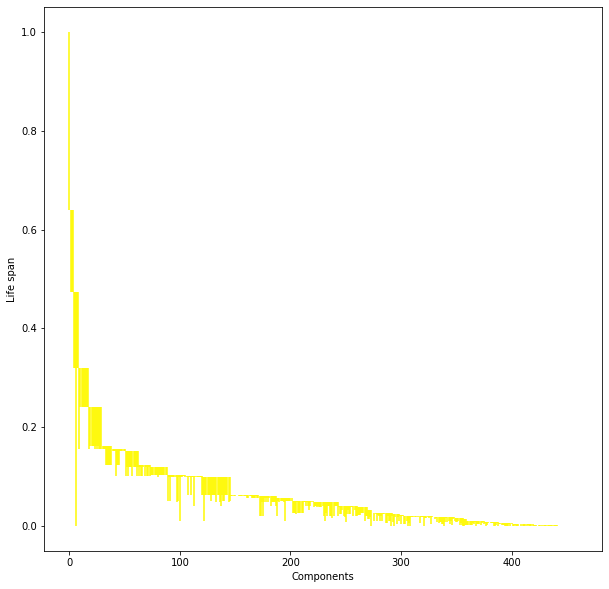

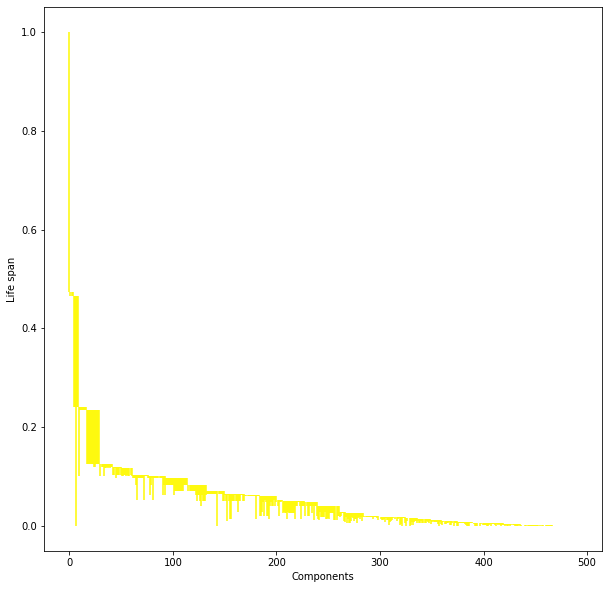

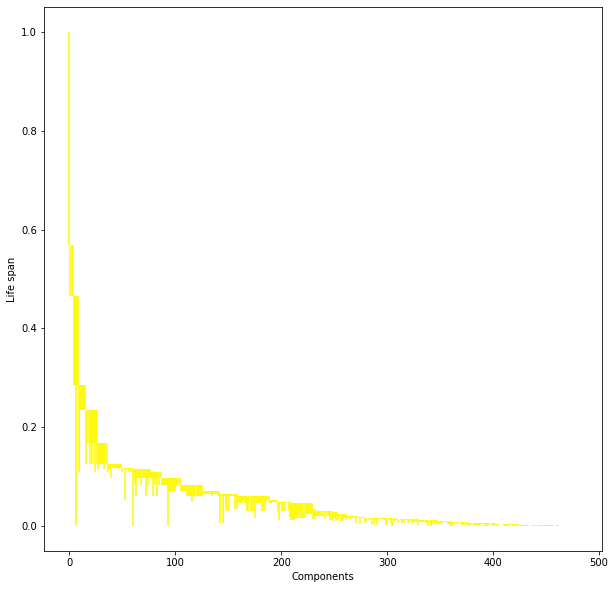

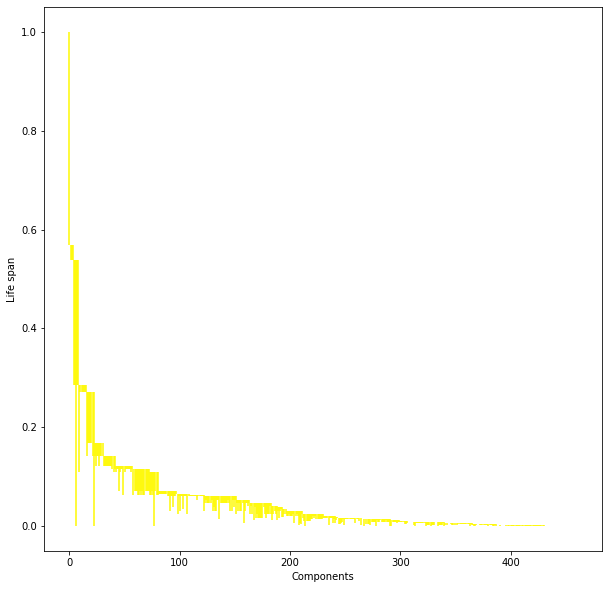

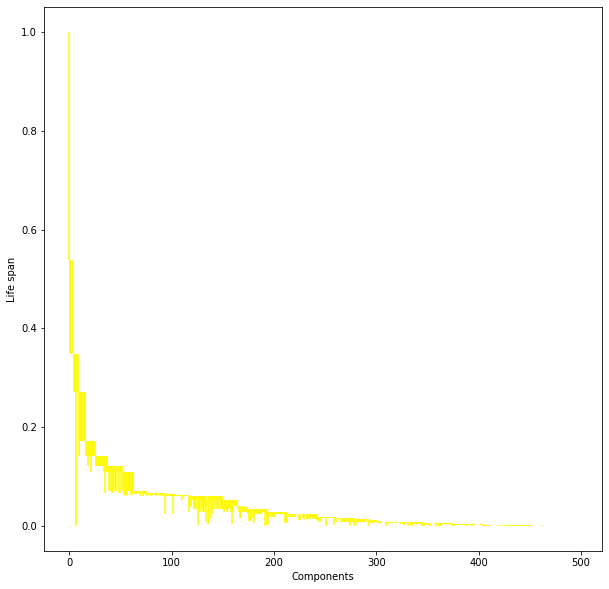

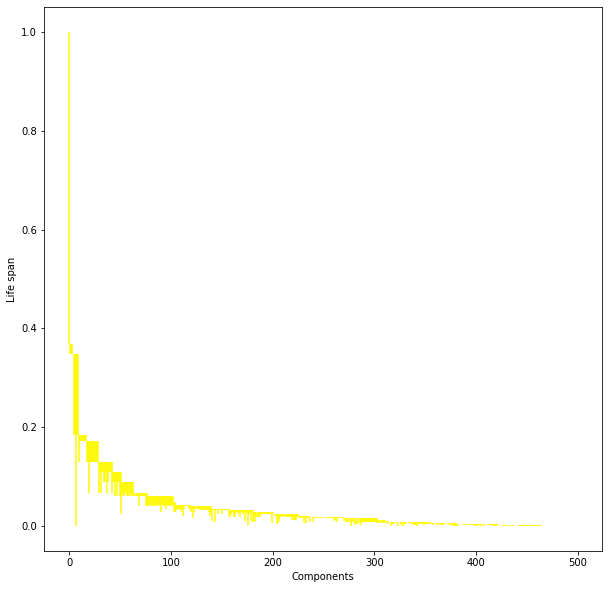

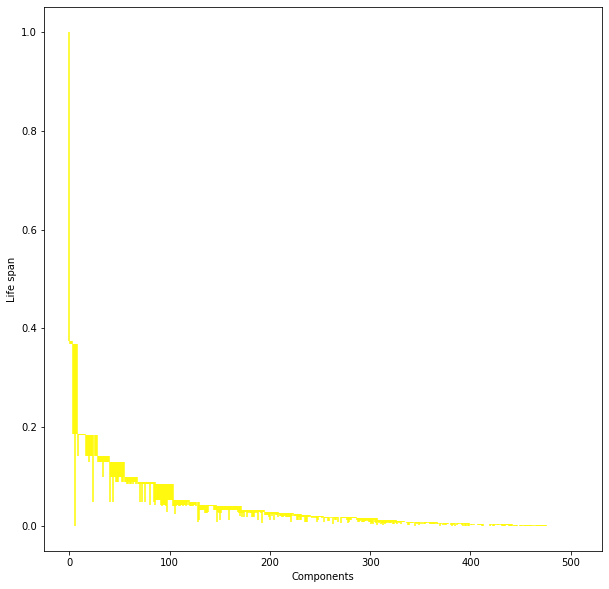

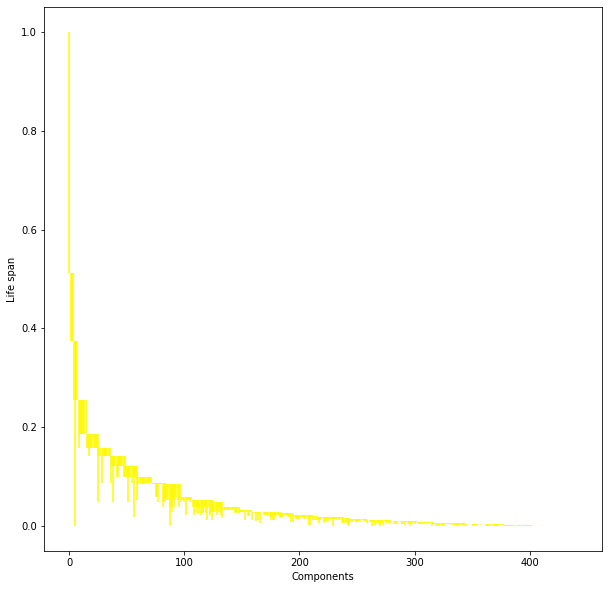

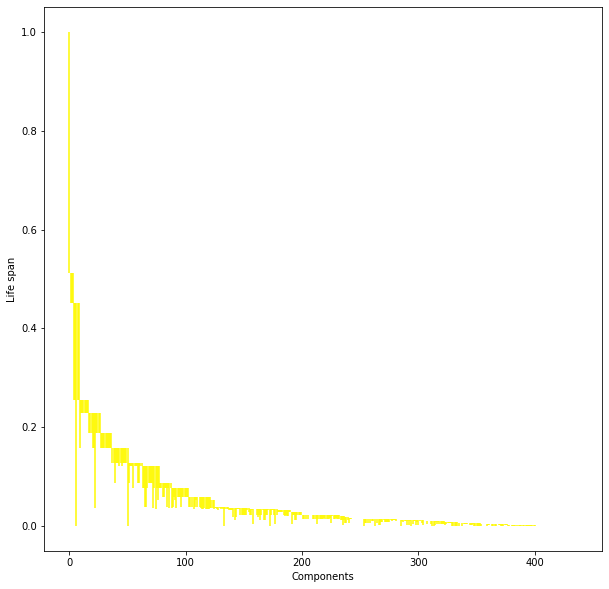

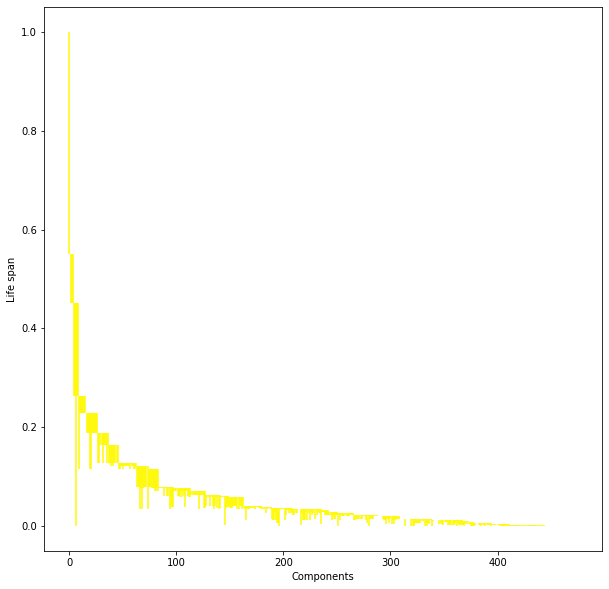

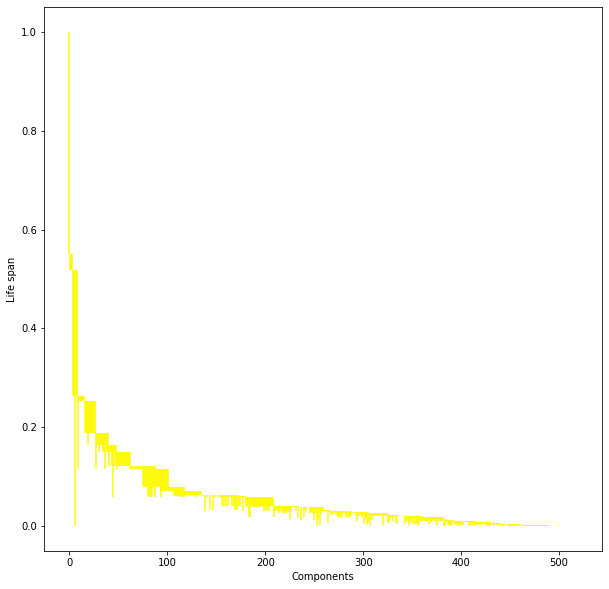

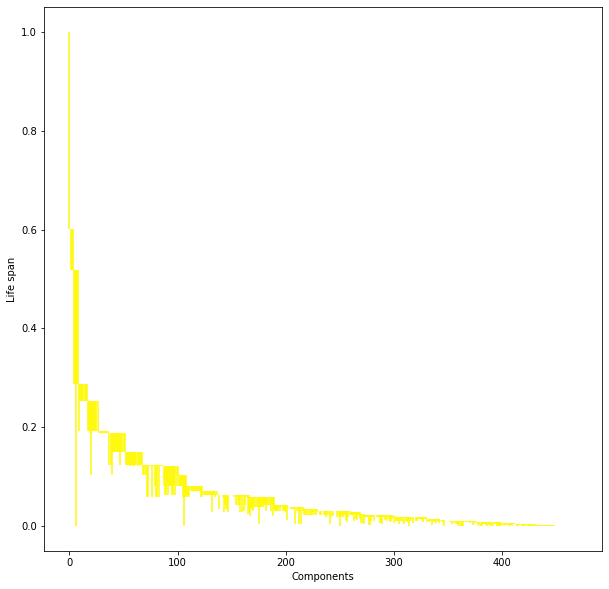

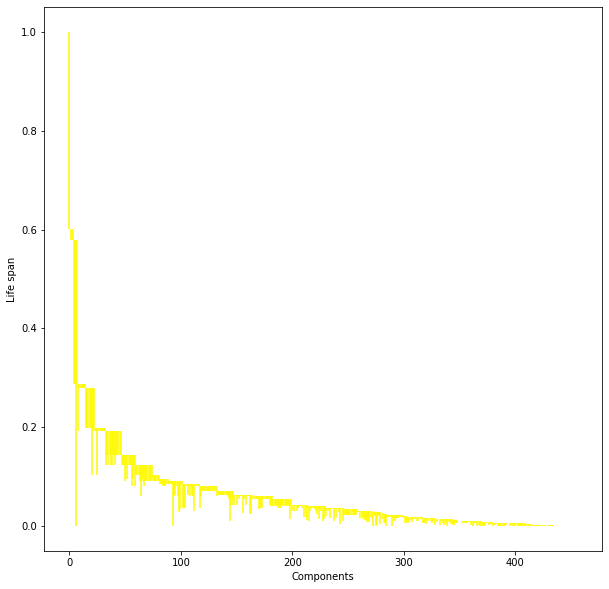

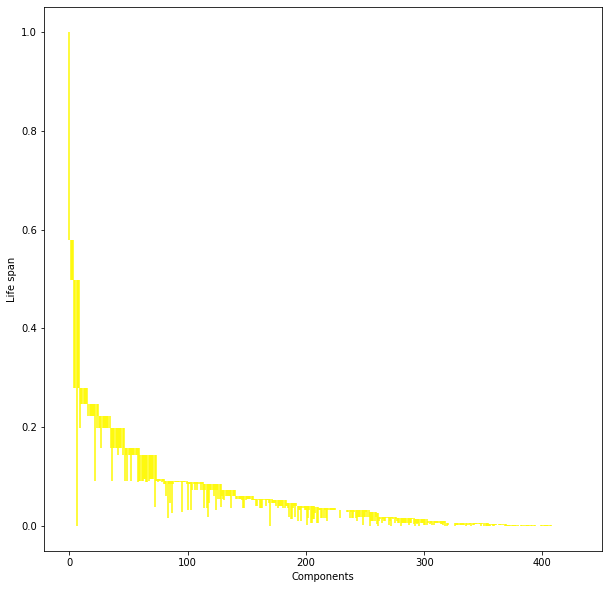

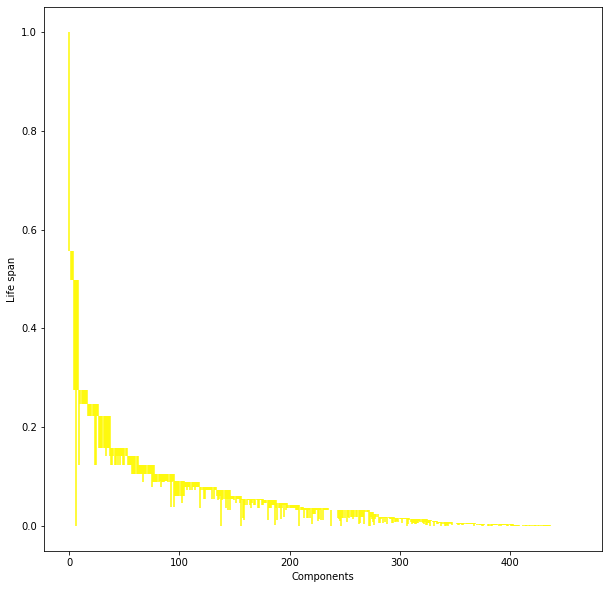

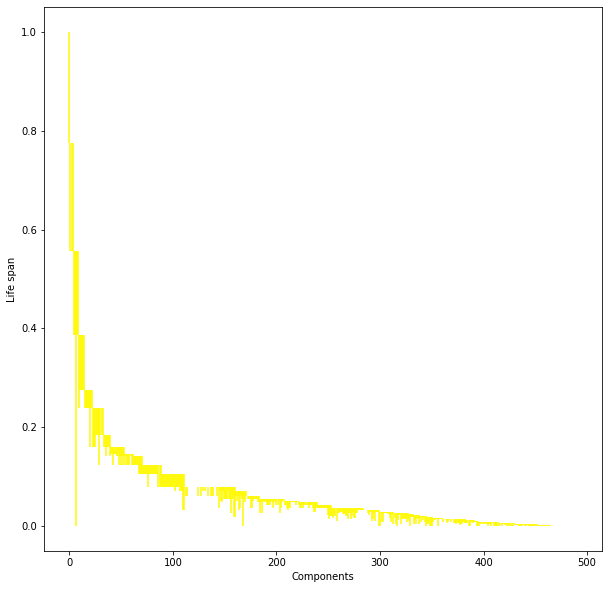

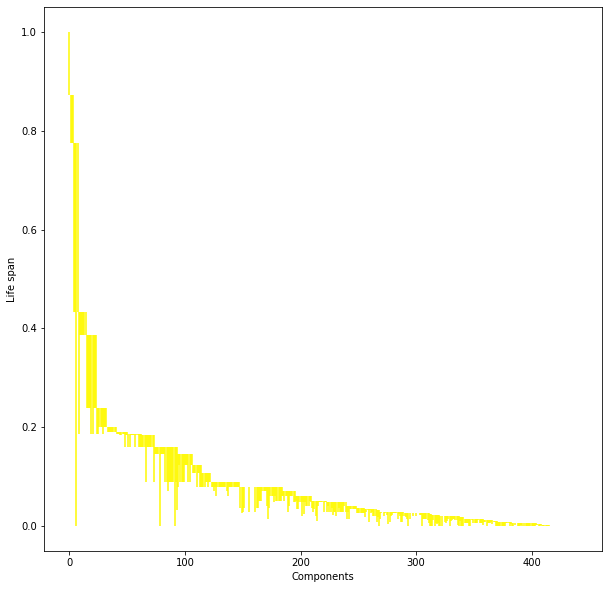

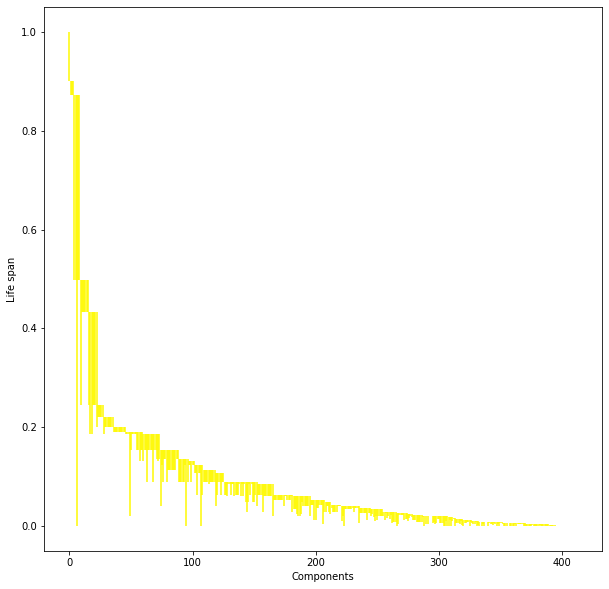

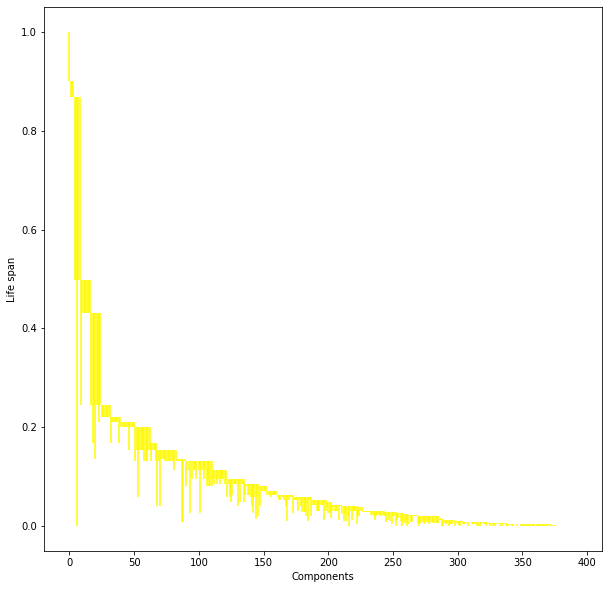

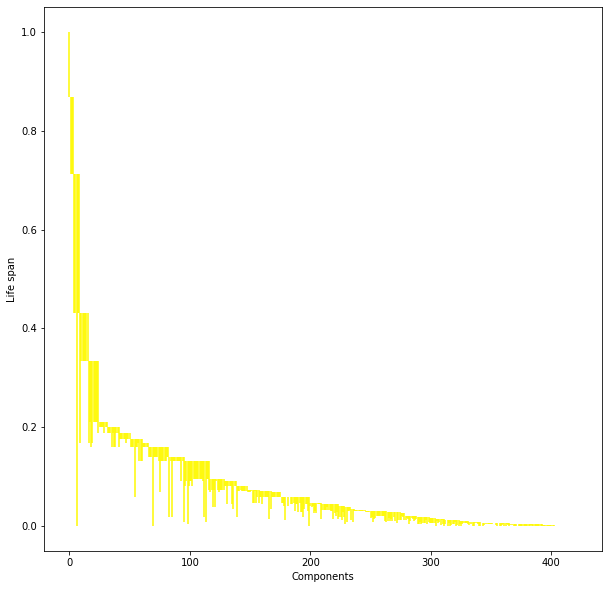

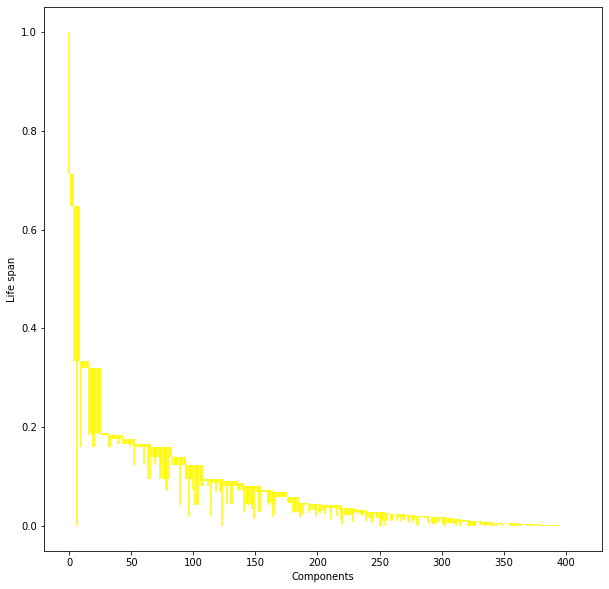

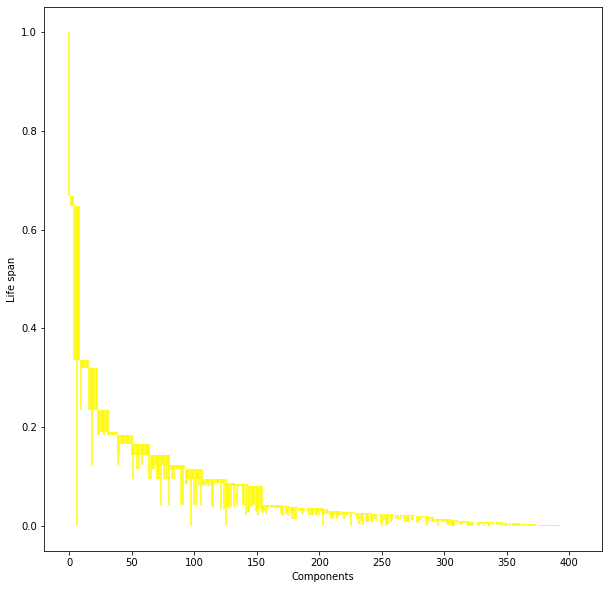

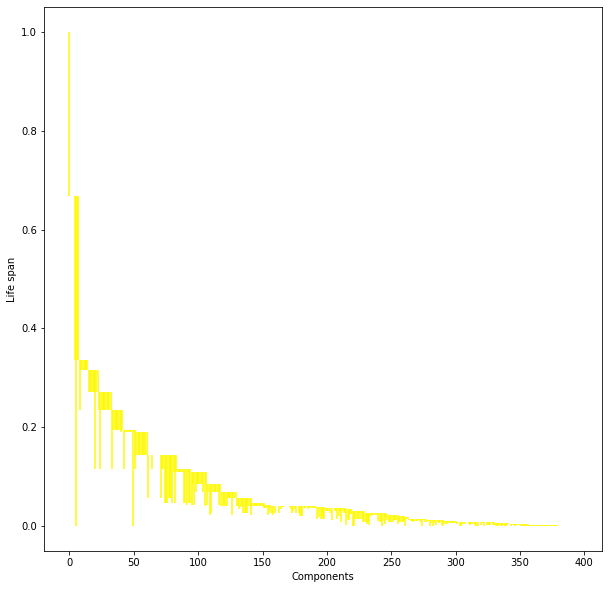

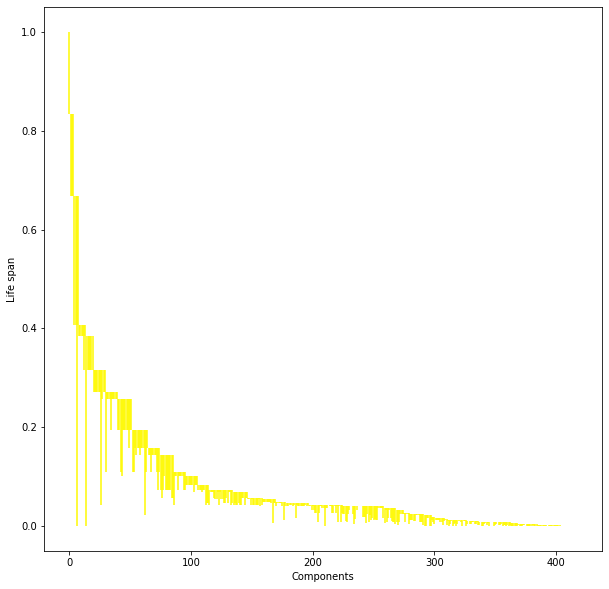

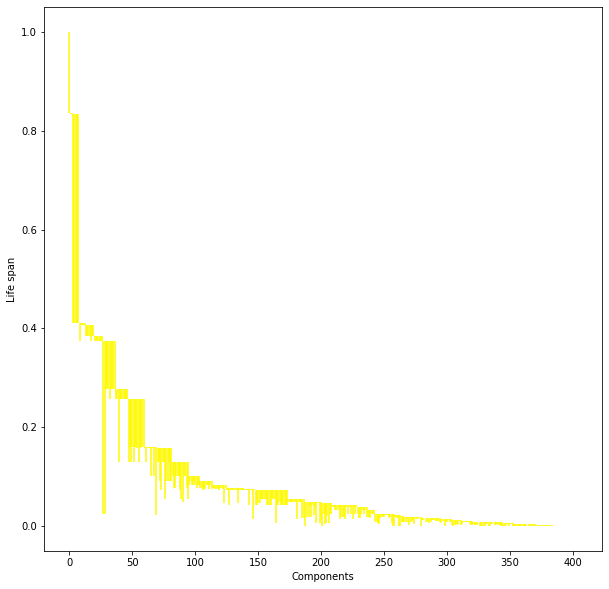

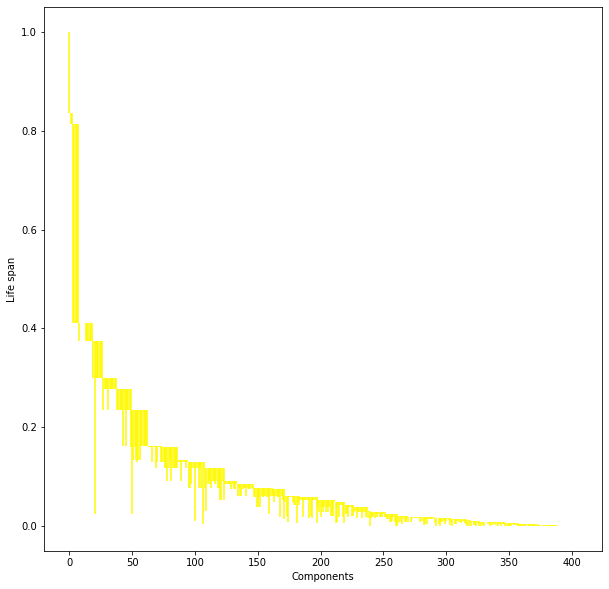

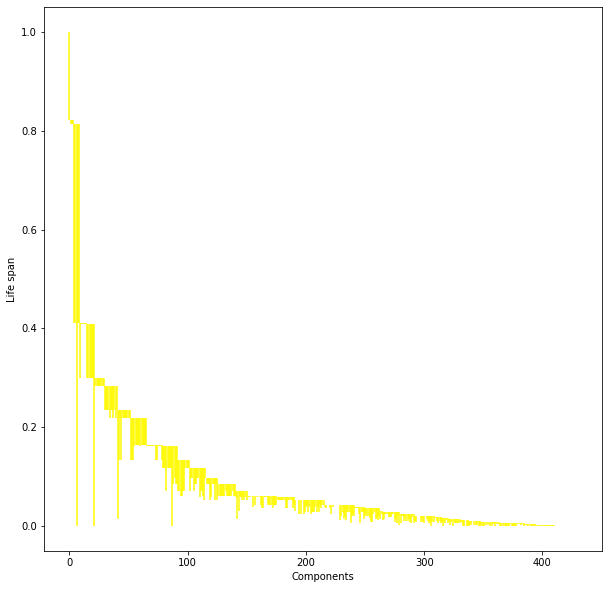

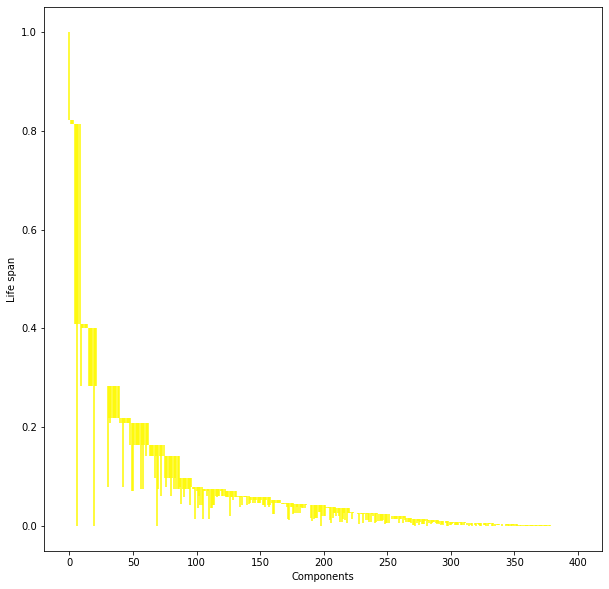

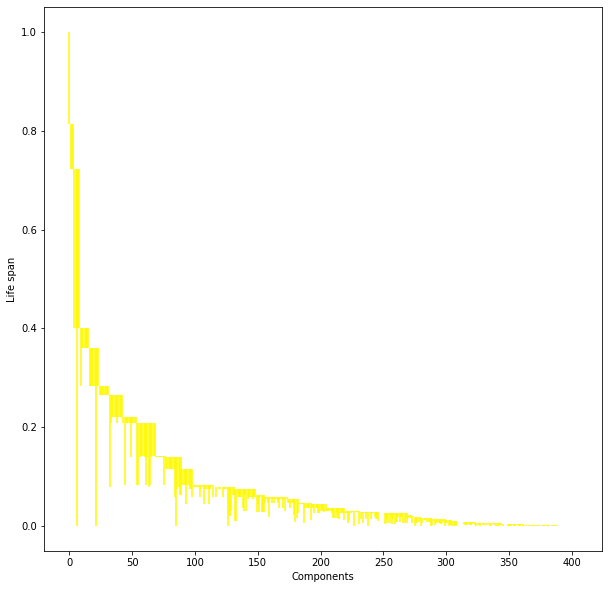

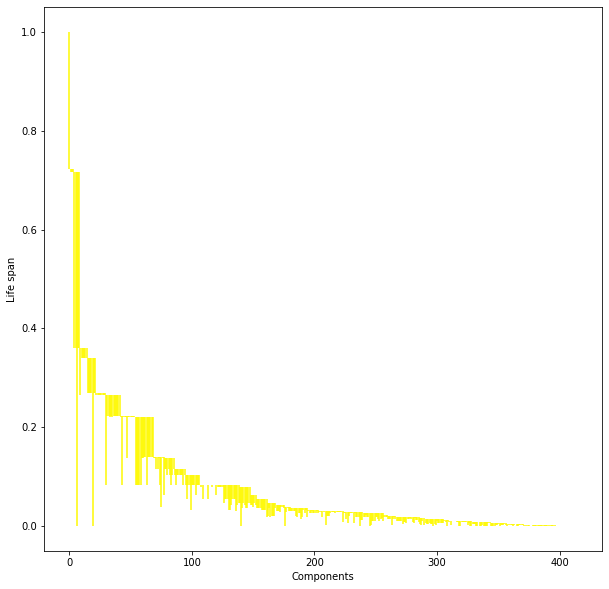

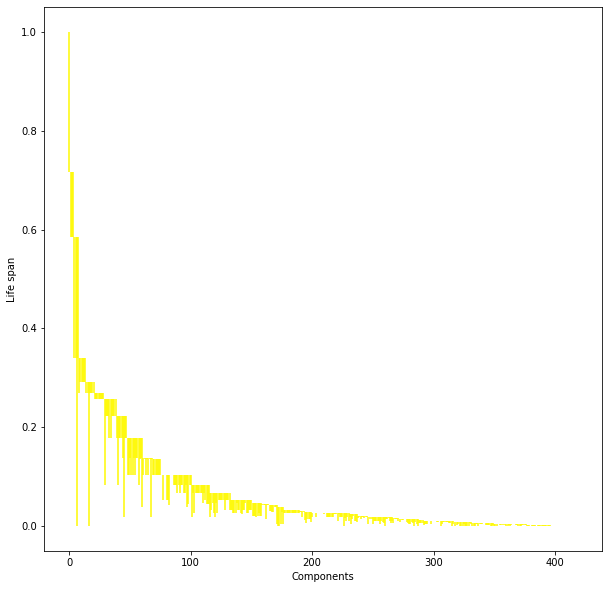

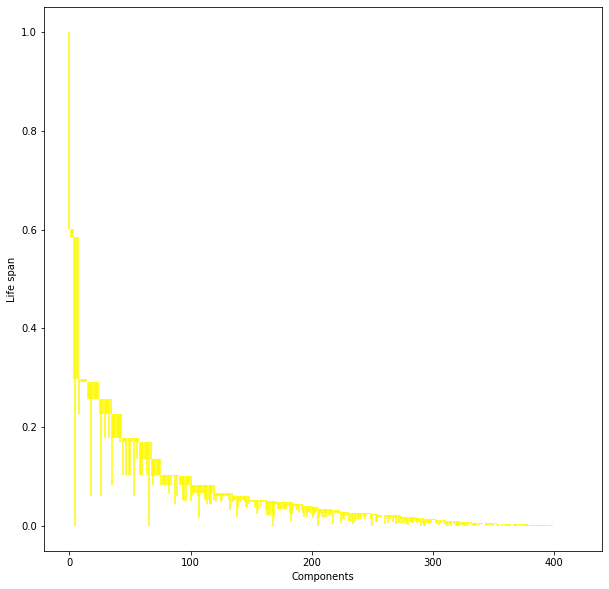

In [14]:
plot_barcodes(barcodes_edges02)

In [1]:
from gudhi import bottleneck_distance
bn_distances01 = compute_bottleneck_distances(barcodes_edges01)
bn_distances02 = compute_bottleneck_distances(barcodes_edges02)
bn_distances01 = compute_bottleneck_distances(barcodes_vertices01)
bn_distances02 = compute_bottleneck_distances(barcodes_vertices02)
plot_bottleneck_distances(bn_distances01)
plot_bottleneck_distances(bn_distances02)


ModuleNotFoundError: No module named 'gudhi'

50


Text(0, 0.5, 'Temperature')

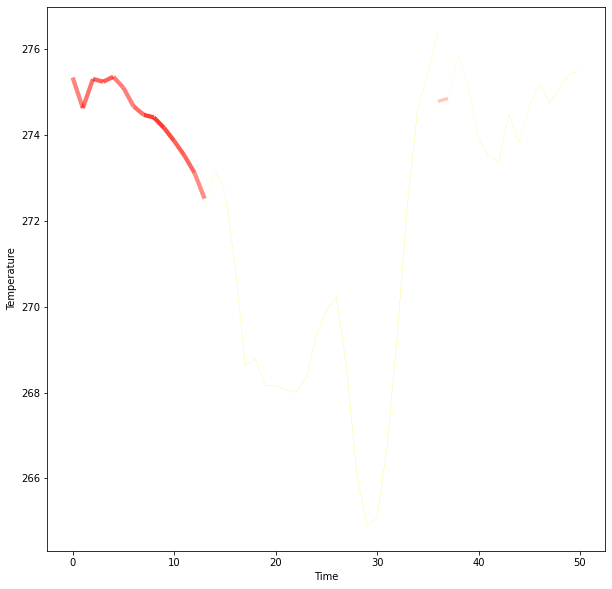

In [16]:
sorted_edges01 = sort_by_ratio_life(g01.edges)

older_edges = [e_t[0] for e_t in sorted_edges01]
plt.figure(figsize=(10,10))
ax = plt.gca()
print(len(older_edges))
for t in range(len(older_edges)):
    ax = plot_edges(g01, older_edges[t],t, ax=ax)
ax.autoscale()
ax.set_xlabel("Time")
ax.set_ylabel("Temperature")

Text(0, 0.5, 'Temperature')

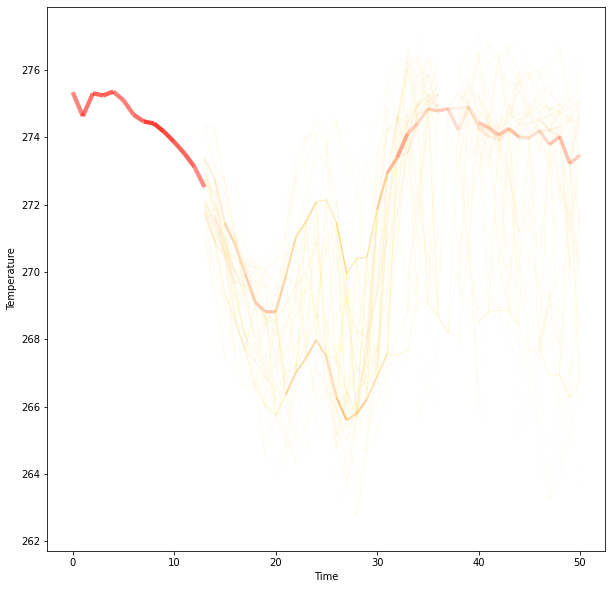

In [17]:

contemporaries_older_edges01 = [get_contemporaries(g01, e) for e in older_edges]
plt.figure(figsize=(10,10))
ax = plt.gca()
for t in range(len(contemporaries_older_edges01)):
    ax = plot_edges(g01, contemporaries_older_edges01[t], t, ax=ax, 
                    threshold_m=2, 
                    #threshold_l=stats01["mean_ratio_life"]+ stats01["std_ratio_life"]
                   )
ax.autoscale()
ax.set_xlabel("Time")
ax.set_ylabel("Temperature")

Text(0, 0.5, 'Temperature')

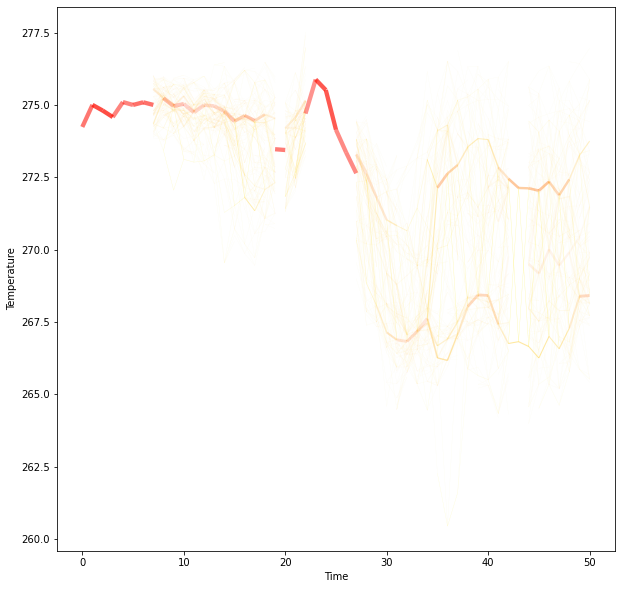

In [18]:
sorted_edges02 = sort_by_ratio_life(g02.edges)

older_edges = [e_t[0] for e_t in sorted_edges02]

contemporaries_older_edges02 = [get_contemporaries(g02, e) for e in older_edges]
plt.figure(figsize=(10,10))
ax = plt.gca()
for t in range(len(contemporaries_older_edges02)):
    ax = plot_edges(g02, contemporaries_older_edges02[t], t, ax=ax, 
                    threshold_m=2, 
                    #threshold_l=stats02["mean_ratio_life"]+stats02["std_ratio_life"]
                   )
ax.autoscale()
ax.set_xlabel("Time")
ax.set_ylabel("Temperature")